# Arrest Cluster Analysis

#### Stephanie Andrade

I wanted to further our predictive analysis and incorporate a cluster analysis using the park and arrests dataframes that were joined in a previous datawrangling notebook. The goal of this was to see if certain arrests were more likely to occur in certain parks, specifically, parks locatied within certain distance of the park.

This notebook provides a brief analysis of arrests within 100 meters to a park. 

In [1]:
import json
import requests
import pandas as pd
import geopandas as gpd
import plotly
import plotly.express as px

In [2]:
parkarrests = pd.read_pickle('../NYCParks-SAEC/parkarrests.pandas')

parkarrests = gpd.GeoDataFrame(parkarrests, 
                        geometry = gpd.points_from_xy(
                         parkarrests.longitude, 
                         parkarrests.latitude, crs='EPSG:4326'))

parkarrests

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,...,communityboard,department,subcategory,precinct,omppropid,sitename,nys_senate,borough,dist_to_park,hundred_m
0,238013474,2021-12-18T00:00:00.000,157,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,...,411,Q-11,Large Park Zone,112,Q084-ZN01,Potamogeton Pond,14,Q,1218.925045,False
8,233697123,2021-09-17T00:00:00.000,157,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,...,411,Q-11,Large Park Zone,112,Q084-ZN01,Potamogeton Pond,14,Q,1218.925045,False
13,230822460,2021-07-14T00:00:00.000,168,SODOMY 1,116.0,SEX CRIMES,PL 1305001,F,Q,105,...,411,Q-11,Large Park Zone,112,Q084-ZN01,Potamogeton Pond,14,Q,1218.925045,False
20,224595667,2021-02-19T00:00:00.000,153,RAPE 3,104.0,RAPE,PL 1302502,F,Q,105,...,411,Q-11,Large Park Zone,112,Q084-ZN01,Potamogeton Pond,14,Q,1218.925045,False
202,237429832,2021-12-06T00:00:00.000,205,"TRESPASS 2, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401501,M,Q,105,...,411,Q-11,Large Park Zone,112,Q084-ZN01,Potamogeton Pond,14,Q,2472.564394,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135134,222855064,2021-01-09T00:00:00.000,29,NYS PAROLE VIOLATION,995.0,FOR OTHER AUTHORITIES,FOA9000029,NaN,K,76,...,306,B-06,Large Park Zone,3,B126-ZN03,Red Hook Park Zone 3,25,B,15.355165,True
138006,223833241,2021-02-02T00:00:00.000,339,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,100,...,414,Q-14,Plgd Within Park,100,Q163-02,Sandpiper Playground,15,Q,243.469132,False
141470,222479318,2021-01-01T00:00:00.000,198,CRIMINAL CONTEMPT 1,126.0,MISCELLANEOUS PENAL LAW,PL 21551B2,F,Q,100,...,414,Q-14,Beach Zone,100,Q164-ZN10A,Rockaway Beach 10a,15,Q,593.077823,False
148850,223872256,2021-02-03T00:00:00.000,268,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1451000,F,M,34,...,112,M-12,Large Park Zone,34,M043-ZN01,Isham Park Zone 1,31,M,72.784607,True


In [3]:
parkarrests.ofns_desc.unique()

array(['RAPE', 'SEX CRIMES', 'CRIMINAL TRESPASS',
       'MISCELLANEOUS PENAL LAW', 'FELONY ASSAULT',
       'CRIMINAL MISCHIEF & RELATED OF', 'GRAND LARCENY',
       'OFF. AGNST PUB ORD SENSBLTY &', 'ROBBERY', 'DANGEROUS DRUGS',
       'ASSAULT 3 & RELATED OFFENSES', 'BURGLARY',
       'INTOXICATED & IMPAIRED DRIVING', 'FORGERY',
       'MURDER & NON-NEGL. MANSLAUGHTE', 'FOR OTHER AUTHORITIES',
       'GRAND LARCENY OF MOTOR VEHICLE', 'POSSESSION OF STOLEN PROPERTY',
       'PETIT LARCENY', 'VEHICLE AND TRAFFIC LAWS', 'DANGEROUS WEAPONS',
       'OFFENSES AGAINST PUBLIC ADMINI', nan,
       'OFFENSES AGAINST THE PERSON', 'OTHER TRAFFIC INFRACTION',
       'THEFT-FRAUD', 'NYS LAWS-UNCLASSIFIED FELONY', 'ESCAPE 3',
       'OFFENSES INVOLVING FRAUD', 'OTHER STATE LAWS (NON PENAL LA',
       'UNAUTHORIZED USE OF A VEHICLE', 'PARKING OFFENSES', 'ARSON',
       'INTOXICATED/IMPAIRED DRIVING', 'ALCOHOLIC BEVERAGE CONTROL LAW',
       'KIDNAPPING & RELATED OFFENSES', 'PROSTITUTION & RELATED O

In [4]:
parkarrests.sitename.unique()

array(['Potamogeton Pond', 'Canarsie Park Zone 5',
       'Ocean Parkway Malls Zone 8', 'Franz Sigel Park Zone 2',
       'Highbridge Park Zone 10', 'Commodore Barry Park Playground',
       'Addabbo Playground', 'Soundview Park Zone 5',
       'Astoria Park Zone 1', 'Marcus Garvey Park Zone 2',
       'Meadow Lake SW', "St. John's Playground",
       'Baisley Pond Park Zone 3', 'Linden Park', 'Hester St Plgd',
       'North Of The Arsenal', "St Mary's Park Zone 2",
       'Pelham Parkway Zone 2', 'Ocean Parkway Malls Zone 2',
       'Columbus Circle', 'Tompkins Square Park',
       'Police Officer Moira Ann Smith Playground', 'Houston St Plgd',
       'Riverside Dr. Pedestrian Zone F', 'Bronx Park Zone 2',
       "Frawleys' Run", 'Ewen Playground', 'Virginia Principe Playground',
       'Monsignor Mcgolrick Playground', 'Broadway Malls Zone 2',
       'Parque De Los Ninos', 'Bush Clinton Park',
       'Silver Lake Park Zone 2', 'Broadway Malls Zone 6',
       'Corporal Thompson Playgr

To be able to run this I thought it would be possible to create a dummies column using the arrest description. This meant that I would be able to pull all the arrest types within a single columna nd be able to put them in their own individual column which would then count the number times they appear. This made the dataframe very large.

In [5]:
#groupby parks and count/sum per line and you will get a ne DF and the number of parks you have and 
#arrest types and in that arrests of each kind that happened in each park 

dummies1 = pd.get_dummies(parkarrests.ofns_desc, prefix='ofns_desc_')  # creates a dataframe of dummies
print(parkarrests.ofns_desc.head())
dummies1

0                   RAPE
8                   RAPE
13            SEX CRIMES
20                  RAPE
202    CRIMINAL TRESPASS
Name: ofns_desc, dtype: object


,ofns_desc__ADMINISTRATIVE CODE,ofns_desc__ADMINISTRATIVE CODES,ofns_desc__AGRICULTURE & MRKTS LAW-UNCLASSIFIED,ofns_desc__ALCOHOLIC BEVERAGE CONTROL LAW,ofns_desc__ANTICIPATORY OFFENSES,ofns_desc__ARSON,ofns_desc__ASSAULT 3 & RELATED OFFENSES,ofns_desc__BURGLAR'S TOOLS,ofns_desc__BURGLARY,ofns_desc__CHILD ABANDONMENT/NON SUPPORT,...,ofns_desc__PETIT LARCENY,ofns_desc__POSSESSION OF STOLEN PROPERTY,ofns_desc__PROSTITUTION & RELATED OFFENSES,ofns_desc__RAPE,ofns_desc__ROBBERY,ofns_desc__SEX CRIMES,ofns_desc__THEFT OF SERVICES,ofns_desc__THEFT-FRAUD,ofns_desc__UNAUTHORIZED USE OF A VEHICLE,ofns_desc__VEHICLE AND TRAFFIC LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138006,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
141470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
parkarrests = parkarrests.join(dummies1) 
parkarrests.columns

Index(['arrest_key', 'arrest_date', 'pd_cd', 'pd_desc', 'ky_cd', 'ofns_desc',
       'law_code', 'law_cat_cd', 'arrest_boro', 'arrest_precinct',
       ...
       'ofns_desc__PETIT LARCENY', 'ofns_desc__POSSESSION OF STOLEN PROPERTY',
       'ofns_desc__PROSTITUTION & RELATED OFFENSES', 'ofns_desc__RAPE',
       'ofns_desc__ROBBERY', 'ofns_desc__SEX CRIMES',
       'ofns_desc__THEFT OF SERVICES', 'ofns_desc__THEFT-FRAUD',
       'ofns_desc__UNAUTHORIZED USE OF A VEHICLE',
       'ofns_desc__VEHICLE AND TRAFFIC LAWS'],
      dtype='object', length=110)

In [7]:
parkarrests = parkarrests.rename(columns={'ofns_desc__ASSAULT 3 & RELATED OFFENSES': 'ofns_desc__ASSAULT_3',
                                         'ofns_desc__FELONY ASSAULT':'ofns_desc__FELONY_ASSAULT',
                                         'ofns_desc__PETIT LARCENY':'ofns_desc__PETIT_LARCENY',
                                         'ofns_desc__DANGEROUS DRUGS': 'ofns_desc__DANGEROUS_DRUGS',
                                         'ofns_desc__MISCELLANEOUS PENAL LAW':'ofns_desc__MISCELLANEOUS_PENAL_LAW',
                                         'ofns_desc__CRIMINAL MISCHIEF & RELATED OF':'ofns_desc__CRIMINAL_MISCHIEF',
                                         'ofns_desc__ROBBERY':'ofns_desc__ROBBERY',
                                         'ofns_desc__DANGEROUS WEAPONS':'ofns_desc__DANGEROUS_WEAPONS'})

In [8]:
pd.set_option('display.max_columns', None)
parkarrests[['sitename','ofns_desc__ASSAULT_3','ofns_desc__FELONY_ASSAULT','ofns_desc__PETIT_LARCENY','ofns_desc__DANGEROUS_DRUGS','ofns_desc__MISCELLANEOUS_PENAL_LAW','ofns_desc__CRIMINAL_MISCHIEF','ofns_desc__ROBBERY','ofns_desc__DANGEROUS_WEAPONS',]].head(200)

,sitename,ofns_desc__ASSAULT_3,ofns_desc__FELONY_ASSAULT,ofns_desc__PETIT_LARCENY,ofns_desc__DANGEROUS_DRUGS,ofns_desc__MISCELLANEOUS_PENAL_LAW,ofns_desc__CRIMINAL_MISCHIEF,ofns_desc__ROBBERY,ofns_desc__DANGEROUS_WEAPONS
0,Potamogeton Pond,0,0,0,0,0,0,0,0
1,Canarsie Park Zone 5,0,0,0,0,0,0,0,0
2,Ocean Parkway Malls Zone 8,0,0,0,0,0,0,0,0
3,Franz Sigel Park Zone 2,0,0,0,0,0,0,0,0
4,Highbridge Park Zone 10,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
195,Creedmoor Soccer Fields,0,0,0,0,0,0,0,0
196,Imagination Playground at Betsy Head,0,1,0,0,0,0,0,0
197,Belt Parkway/Shore Parkway Zone 2,0,0,1,0,0,0,0,0
198,Rufus King Park Playground,0,0,0,0,0,0,0,0


In [9]:
parkarrests['pc_ofns_desc__ASSAULT 3 & RELATED OFFENSES'] = parkarrests.ofns_desc__ASSAULT_3 / (155511)*100
parkarrests['pc_ofns_desc__FELONY ASSAULT'] = parkarrests.ofns_desc__FELONY_ASSAULT / (155511)*100
parkarrests['pc_ofns_desc__PETIT LARCENY'] = parkarrests.ofns_desc__PETIT_LARCENY / (155511)*100
parkarrests['pc_ofns_desc__DANGEROUS DRUGS'] = parkarrests.ofns_desc__DANGEROUS_DRUGS / (155511)*100
parkarrests['pc_ofns_desc__MISCELLANEOUS PENAL LAW'] = parkarrests.ofns_desc__MISCELLANEOUS_PENAL_LAW / (155511)*100
parkarrests['pc_ofns_desc__CRIMINAL MISCHIEF & RELATED OF'] = parkarrests.ofns_desc__CRIMINAL_MISCHIEF / (155511)*100
parkarrests['pc_ofns_desc__ROBBERY'] = parkarrests.ofns_desc__ROBBERY / (155511)*100
parkarrests['pc_ofns_desc__DANGEROUS WEAPONS'] = parkarrests.ofns_desc__DANGEROUS_WEAPONS / (155511)*100

parkarrests

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi,geometry,index_right,propname,retireddate,zipcode,acres,location,nys_assembly,councildistrict,description,us_congress,gispropnum,retired,communityboard,department,subcategory,precinct,omppropid,sitename,nys_senate,borough,dist_to_park,hundred_m,ofns_desc__ADMINISTRATIVE CODE,ofns_desc__ADMINISTRATIVE CODES,ofns_desc__AGRICULTURE & MRKTS LAW-UNCLASSIFIED,ofns_desc__ALCOHOLIC BEVERAGE CONTROL LAW,ofns_desc__ANTICIPATORY OFFENSES,ofns_desc__ARSON,ofns_desc__ASSAULT_3,ofns_desc__BURGLAR'S TOOLS,ofns_desc__BURGLARY,ofns_desc__CHILD ABANDONMENT/NON SUPPORT,ofns_desc__CRIMINAL_MISCHIEF,ofns_desc__CRIMINAL TRESPASS,ofns_desc__DANGEROUS_DRUGS,ofns_desc__DANGEROUS_WEAPONS,ofns_desc__DISORDERLY CONDUCT,ofns_desc__ENDAN WELFARE INCOMP,ofns_desc__ESCAPE 3,ofns_desc__FELONY_ASSAULT,ofns_desc__FELONY SEX CRIMES,ofns_desc__FOR OTHER AUTHORITIES,ofns_desc__FORGERY,ofns_desc__FRAUDS,ofns_desc__FRAUDULENT ACCOSTING,ofns_desc__GAMBLING,ofns_desc__GRAND LARCENY,ofns_desc__GRAND LARCENY OF MOTOR VEHICLE,ofns_desc__HARRASSMENT 2,"ofns_desc__HOMICIDE-NEGLIGENT,UNCLASSIFIE",ofns_desc__HOMICIDE-NEGLIGENT-VEHICLE,ofns_desc__INTOXICATED & IMPAIRED DRIVING,ofns_desc__INTOXICATED/IMPAIRED DRIVING,ofns_desc__JOSTLING,ofns_desc__KIDNAPPING,ofns_desc__KIDNAPPING & RELATED OFFENSES,ofns_desc__KIDNAPPING AND RELATED OFFENSES,"ofns_desc__LOITERING/GAMBLING (CARDS, DIC",ofns_desc__MISCELLANEOUS_PENAL_LAW,ofns_desc__MOVING INFRACTIONS,ofns_desc__MURDER & NON-NEGL. MANSLAUGHTE,ofns_desc__NEW YORK CITY HEALTH CODE,ofns_desc__NYS LAWS-UNCLASSIFIED FELONY,ofns_desc__OFF. AGNST PUB ORD SENSBLTY &,ofns_desc__OFFENSES AGAINST PUBLIC ADMINI,ofns_desc__OFFENSES AGAINST PUBLIC SAFETY,ofns_desc__OFFENSES AGAINST THE PERSON,ofns_desc__OFFENSES INVOLVING FRAUD,ofns_desc__OFFENSES RELATED TO CHILDREN,ofns_desc__OTHER OFFENSES RELATED TO THEF,ofns_desc__OTHER STATE LAWS,ofns_desc__OTHER STATE LAWS (NON PENAL LA,ofns_desc__OTHER STATE LAWS (NON PENAL LAW),ofns_desc__OTHER TRAFFIC INFRACTION,ofns_desc__PARKING OFFENSES,ofns_desc__PETIT_LARCENY,ofns_desc__POSSESSION OF STOLEN PROPERTY,ofns_desc__PROSTITUTION & RELATED OFFENSES,ofns_desc__RAPE,ofns_desc__ROBBERY,ofns_desc__SEX CRIMES,ofns_desc__THEFT OF SERVICES,ofns_desc__THEFT-FRAUD,ofns_desc__UNAUTHORIZED USE OF A VEHICLE,ofns_desc__VEHICLE AND TRAFFIC LAWS,pc_ofns_desc__ASSAULT 3 & RELATED OFFENSES,pc_ofns_desc__FELONY ASSAULT,pc_ofns_desc__PETIT LARCENY,pc_ofns_desc__DANGEROUS DRUGS,pc_ofns_desc__MISCELLANEOUS PENAL LAW,pc_ofns_desc__CRIMINAL MISCHIEF & RELATED OF,pc_ofns_desc__ROBBERY,pc_ofns_desc__DANGEROUS WEAPONS
0,238013474,2021-12-18T00:00:00.000,157,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.72618713000002,-73.73523390399998,"{'type': 'Point', 'coordinates': [-73.73523390...",63,3,16,63,24337,POINT (-73.73523 40.72619),771,Grand Central Parkway,None,11427,12.95352546,"North Of Grand Central Pkwy, From Bell Blvd To...",24,23,Grand Central Parkway-Potamogeton Pond,6,Q084,False,411,Q-11,Large Park Zone,112,Q084-ZN01,Potamogeton Pond,14,Q,1218.925045,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,236943583,2021-11-25T00:00:00.000,263,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.63686750900007,-73.89158591899997,"{'type': 'Point', 'coordinates': [-73.89158591...",5,2,8,42,13827,POINT (-73.89159 40.63687),816,Canarsie Park,None,11236,26.05383876,"Seaview Ave, Belt Pkwy, E 102 St, E 105 St: Ba...",59,46,Canarsie Park Zone 5,8,B018,False,318,B-18,Large Park Zone,69,B018-ZN05,Canarsie Park Zo

I realized that I had not joined the new dummies dataframe and the origianl dataframe with distance to the park as a relevant index. To fix this I decided to try something different and ran a grouby using the parks (sitename column). Unfortunately, what this did was it summed up every component within the column and messed up the dataframe and my initial goals of this analysis. I still do not know how this could have been manipulated better, but with more time I am sure this could have been resolved to represent a more clear cleaning of the data for analysis of the parks and arrests dataframe.

In [36]:
pd.set_option('display.max_columns', None)
parkarrests_grouped=parkarrests.groupby('sitename').count()

In [37]:
parkarrests_grouped

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi,geometry,index_right,propname,retireddate,zipcode,acres,location,nys_assembly,councildistrict,description,us_congress,gispropnum,retired,communityboard,department,subcategory,precinct,omppropid,nys_senate,borough,dist_to_park,hundred_m,ofns_desc__ADMINISTRATIVE CODE,ofns_desc__ADMINISTRATIVE CODES,ofns_desc__AGRICULTURE & MRKTS LAW-UNCLASSIFIED,ofns_desc__ALCOHOLIC BEVERAGE CONTROL LAW,ofns_desc__ANTICIPATORY OFFENSES,ofns_desc__ARSON,ofns_desc__ASSAULT_3,ofns_desc__BURGLAR'S TOOLS,ofns_desc__BURGLARY,ofns_desc__CHILD ABANDONMENT/NON SUPPORT,ofns_desc__CRIMINAL_MISCHIEF,ofns_desc__CRIMINAL TRESPASS,ofns_desc__DANGEROUS_DRUGS,ofns_desc__DANGEROUS_WEAPONS,ofns_desc__DISORDERLY CONDUCT,ofns_desc__ENDAN WELFARE INCOMP,ofns_desc__ESCAPE 3,ofns_desc__FELONY_ASSAULT,ofns_desc__FELONY SEX CRIMES,ofns_desc__FOR OTHER AUTHORITIES,ofns_desc__FORGERY,ofns_desc__FRAUDS,ofns_desc__FRAUDULENT ACCOSTING,ofns_desc__GAMBLING,ofns_desc__GRAND LARCENY,ofns_desc__GRAND LARCENY OF MOTOR VEHICLE,ofns_desc__HARRASSMENT 2,"ofns_desc__HOMICIDE-NEGLIGENT,UNCLASSIFIE",ofns_desc__HOMICIDE-NEGLIGENT-VEHICLE,ofns_desc__INTOXICATED & IMPAIRED DRIVING,ofns_desc__INTOXICATED/IMPAIRED DRIVING,ofns_desc__JOSTLING,ofns_desc__KIDNAPPING,ofns_desc__KIDNAPPING & RELATED OFFENSES,ofns_desc__KIDNAPPING AND RELATED OFFENSES,"ofns_desc__LOITERING/GAMBLING (CARDS, DIC",ofns_desc__MISCELLANEOUS_PENAL_LAW,ofns_desc__MOVING INFRACTIONS,ofns_desc__MURDER & NON-NEGL. MANSLAUGHTE,ofns_desc__NEW YORK CITY HEALTH CODE,ofns_desc__NYS LAWS-UNCLASSIFIED FELONY,ofns_desc__OFF. AGNST PUB ORD SENSBLTY &,ofns_desc__OFFENSES AGAINST PUBLIC ADMINI,ofns_desc__OFFENSES AGAINST PUBLIC SAFETY,ofns_desc__OFFENSES AGAINST THE PERSON,ofns_desc__OFFENSES INVOLVING FRAUD,ofns_desc__OFFENSES RELATED TO CHILDREN,ofns_desc__OTHER OFFENSES RELATED TO THEF,ofns_desc__OTHER STATE LAWS,ofns_desc__OTHER STATE LAWS (NON PENAL LA,ofns_desc__OTHER STATE LAWS (NON PENAL LAW),ofns_desc__OTHER TRAFFIC INFRACTION,ofns_desc__PARKING OFFENSES,ofns_desc__PETIT_LARCENY,ofns_desc__POSSESSION OF STOLEN PROPERTY,ofns_desc__PROSTITUTION & RELATED OFFENSES,ofns_desc__RAPE,ofns_desc__ROBBERY,ofns_desc__SEX CRIMES,ofns_desc__THEFT OF SERVICES,ofns_desc__THEFT-FRAUD,ofns_desc__UNAUTHORIZED USE OF A VEHICLE,ofns_desc__VEHICLE AND TRAFFIC LAWS,pc_ofns_desc__ASSAULT 3 & RELATED OFFENSES,pc_ofns_desc__FELONY ASSAULT,pc_ofns_desc__PETIT LARCENY,pc_ofns_desc__DANGEROUS DRUGS,pc_ofns_desc__MISCELLANEOUS PENAL LAW,pc_ofns_desc__CRIMINAL MISCHIEF & RELATED OF,pc_ofns_desc__ROBBERY,pc_ofns_desc__DANGEROUS WEAPONS
sitename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
136 St Playground,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,0,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89
157 St Playground,293,293,293,293,293,293,293,292,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,0,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293
173 St Playground (det. Williams),281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,2

This dataframe was changed everywhere. I do not understand what is being counted, but it is not supposed to look like this. I think a solution for this would have been to join the dataframe and create a count of arrests per park that is 100 meters close to the park. Each arrest type would be in its own column. I somewhat did this, but very messy in my dataframe above. After already running a cluster analysis, I realized at this step that my cluster would probably not be very pretty. I still wanted to follow through and see what would result from this dataframe and learn what NOT to do. 

In [12]:
import seaborn as sns

sns.pairplot?

In [38]:
cols_to_plot = [col for col in parkarrests.columns if 'pc_ofns_desc_' in col]

In [39]:
cols_to_plot

['pc_ofns_desc__ASSAULT 3 & RELATED OFFENSES',
 'pc_ofns_desc__FELONY ASSAULT',
 'pc_ofns_desc__PETIT LARCENY',
 'pc_ofns_desc__DANGEROUS DRUGS',
 'pc_ofns_desc__MISCELLANEOUS PENAL LAW',
 'pc_ofns_desc__CRIMINAL MISCHIEF & RELATED OF',
 'pc_ofns_desc__ROBBERY',
 'pc_ofns_desc__DANGEROUS WEAPONS']

In [40]:
parkarrests[cols_to_plot].reset_index(drop=True)

,pc_ofns_desc__ASSAULT 3 & RELATED OFFENSES,pc_ofns_desc__FELONY ASSAULT,pc_ofns_desc__PETIT LARCENY,pc_ofns_desc__DANGEROUS DRUGS,pc_ofns_desc__MISCELLANEOUS PENAL LAW,pc_ofns_desc__CRIMINAL MISCHIEF & RELATED OF,pc_ofns_desc__ROBBERY,pc_ofns_desc__DANGEROUS WEAPONS
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
155514,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000643,0.000000
155515,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000643
155516,0.000643,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
155517,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000643


In [1]:
#ax = sns.pairplot(parkarrests[cols_to_plot], kind='reg') 

The first plot I wanted to run would be a seaborn scatter plot. I already got many errors. Given that my variables were not set up correstly in the dataframe it makes sense why these scatterplots did not successfully run. My goal was to use Lecture 15 proposition analysis as a guide to help me set up an anlaysis for arrest types, bu this did not pan out the way I visioned.

In [18]:
from sklearn.cluster import KMeans
KMeans?

In [19]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(parkarrests[cols_to_plot])

# as in the previous lecture, 
# the scaler returns a numpy array, so we cast this as a DataFrame 
# and need to specify the column names and index
parkarrests_scaled = pd.DataFrame(scaler.transform(parkarrests[cols_to_plot]), 
                         columns=cols_to_plot, index=parkarrests.index)

In [2]:
#ax = sns.pairplot(parkarrests_scaled, kind='reg')

Another error on the secon more detail scatterplot unfortunately.

In [21]:
print(len(parkarrests_scaled))
parkarrests_scaled = parkarrests_scaled.dropna()
print(len(parkarrests_scaled))

kmeans = KMeans(n_clusters=5, random_state=1).fit(parkarrests_scaled)
print(kmeans)

155519
155519
KMeans(n_clusters=5, random_state=1)


In [22]:
kmeans.labels_

array([2, 2, 2, ..., 0, 2, 3], dtype=int32)

In [23]:
kmeans.cluster_centers_

array([[ 2.18884972, -0.33369164, -0.30427043, -0.26839278, -0.26670937,
        -0.25211026, -0.23053236, -0.22047142],
       [-0.45686097, -0.33369164, -0.30427043,  3.72588257, -0.26670937,
        -0.25211026, -0.23053236, -0.22047142],
       [-0.45686097, -0.33369164,  0.20270243, -0.26839278,  0.17767956,
        -0.25211026,  0.15357874,  0.14687623],
       [-0.45686097, -0.33369164, -0.30427043, -0.26839278, -0.26670937,
         3.96651847, -0.23053236, -0.22047142],
       [-0.45686097,  2.99677874, -0.30427043, -0.26839278, -0.26670937,
        -0.25211026, -0.23053236, -0.22047142]])

In [24]:
#5 Cluster and 8 Variables
print(kmeans.cluster_centers_.shape)
print(len(parkarrests_scaled.columns))

(5, 8)
8


In [25]:
kmeans.labels_

array([2, 2, 2, ..., 0, 2, 3], dtype=int32)

In [26]:
print(kmeans.labels_.shape)
print(len(parkarrests_scaled))

(155519,)
155519


In [27]:
parkarrests_scaled['cluster_id'] = kmeans.labels_

In [28]:
parkarrests_scaled.groupby('cluster_id').size()

cluster_id
0    26855
1    10450
2    93338
3     9294
4    15582
dtype: int64

In [3]:
#ax = sns.pairplot(parkarrests_scaled, hue='cluster_id', )

And a final error on the scatterplots. This analysis was not very helpful for us. Although it did teach me more about how cluster anlaysis work in python there is not much significant data given that can help us with our park and arrests data or answering our overall research questions.

In [30]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [31]:
def radar_plot(kmeans, parkarrests_scaled):
    N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
    k = kmeans.n_clusters
    theta = radar_factory(N, frame='polygon')
    data = kmeans.cluster_centers_.T
    spoke_labels = [col for col in parkarrests_scaled.columns if col!='cluster_id']
    fig, ax = plt.subplots(figsize=(9, 9),
                                subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    ax.plot(theta, data) #, color=color)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ['Cluster {}'.format(kk) for kk in range(k)]
    ax.legend(labels, loc=(0.9, .95),
                                labelspacing=0.1, fontsize='small')

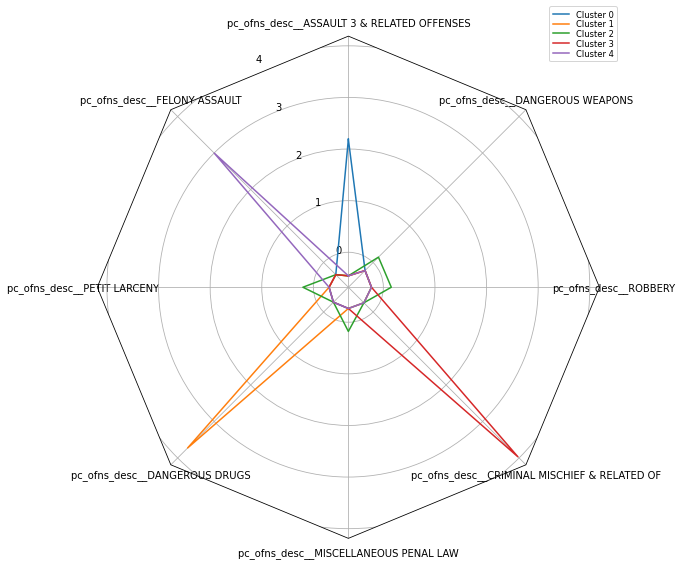

In [32]:
radar_plot(kmeans, parkarrests_scaled)

/var/folders/bh/4zzy2ycd00q12kr_sv2j5cxr0000gn/T/ipykernel_44383/258281837.py:4: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=10, random_state=1).fit(parkarrests_scaled)


cluster_id
1    54775
2    13178
3    26855
4    10328
5    10450
6    15582
7     7848
8     7209
9     9294
dtype: int64


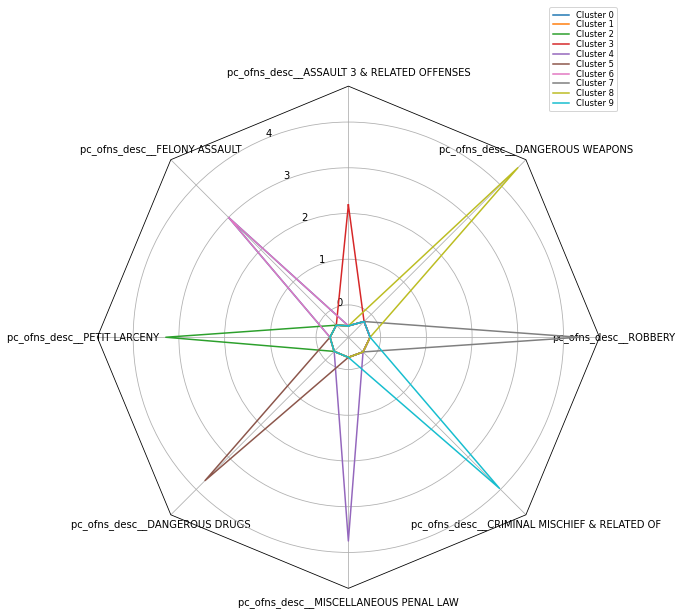

In [33]:
parkarrests_scaled.drop(columns=['cluster_id'], inplace=True)  

# this is the same code as before
kmeans = KMeans(n_clusters=10, random_state=1).fit(parkarrests_scaled)
parkarrests_scaled['cluster_id'] = kmeans.labels_
print(parkarrests_scaled.groupby('cluster_id').size())
radar_plot(kmeans, parkarrests_scaled)

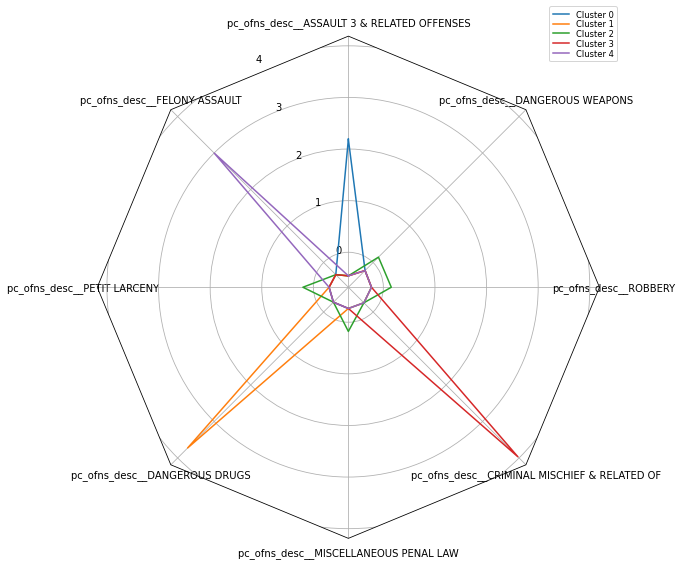

In [34]:
parkarrests_scaled.drop(columns=['cluster_id'], inplace=True) 
kmeans = KMeans(n_clusters=5, random_state=1).fit(parkarrests_scaled)
parkarrests_scaled['cluster_id'] = kmeans.labels_
radar_plot(kmeans, parkarrests_scaled)

Text(0.5, 1.0, 'Arrests near NYC Parks')

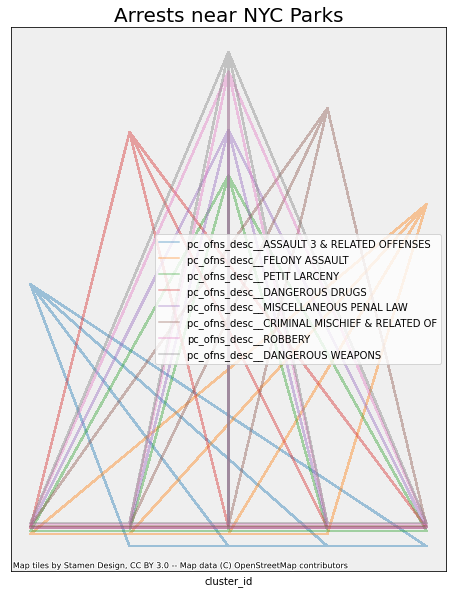

In [35]:
import contextily as ctx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

parkarrests_scaled.plot('cluster_id', legend=True, ax = ax, alpha=0.4)
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite)

# and we really don't need the axis ticks and labels, so we set them to an empty list
ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Arrests near NYC Parks', fontsize=20)

# Conclusion

Looking at these Kmean cluster we can see two main things that point us to why they did not work.

1. The kmeans form a star. There is no correlations within the cluster as we saw in our lecture.

2. The arrests types are dependent on one another which was not my goal in creating this cluster analysis.

3. The map of the cluster did not work out either.

So, what can we do moving forward to be able to either produce a better analysis or create dataframes that are viable for this type or analysis?

## Solutions

1. Reduce the number of arrests types and organize them into categories.

Some things we might be able to do to solve these issues can be fixing our dataframe and cleaning it so that it is fit for these types of analysis. There are over 60 different arrest types. These could have been categorized into new categories (Elise did some of this in one of the cleaning notebooks). Although I am not sure if this would give way for the cluster analysis to work this would make for a more straightforward dataframe that could be more viable for more spcific analysis.

2. Choose a different type of analysis.

Elise's predictive analysis was able to give us more detail analysis that allowed us to come to a conclusion on the parks where certain arrest types were closest to, as well as the most important variables in all of our dataframes. So, a way to approach this is maybe look deeper into each arrests types and how these variable impact the probabilty of these occuring near parks. Maybe taking these predictive analysis and getting more specific in certain areas of New York where arrests are typically happening.

## Next Steps

Some next steps to be taken for our project is a deeper look at arrests in NYC. We glazed over the surface of this huge datasets with over 150,000 data entries, but we did not analyze the amount of these arrests that were male or female and the ethnicity of those more likely to be arrested. How would this look like in our predicitve model?

We used Census data, but this does not necessarily mean that the same information correlates with park goers. There is a lot of room to continue to look at different analysis for this data and how it can be used to predict arrests around the city.

How can we use this to predict arrests for street vending?

Are certain folks being profiled in these areas?

How old are those being arrested? Can we use a predictive analysis to look at age and sex of those being arrested?